# 1 Extração de Dados

### 1.1 Carregando base dados

In [ ]:
import pandas as pd
dados = pd.read_json('/content/TelecomX_Data.json')

In [19]:
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# Transformação

### Conhecendo o Dataset, convertendo base de dados em data frame, normalizando dados, checando dados nulos

Tranformando JSON em Data frame

In [20]:
import numpy as np

# Carregar os dados
dados = pd.read_json('/content/TelecomX_Data.json')

# Mostrar estrutura original
print("Estrutura original:")
print(dados.head())
print(f"\nShape original: {dados.shape}")

# Função para expandir colunas aninhadas
def expandir_colunas(df, colunas_para_expandir):
    df_expandido = df.copy()

    for coluna in colunas_para_expandir:
        if coluna in df.columns:
            # Expandir a coluna aninhada
            expandido = pd.json_normalize(df[coluna])
            # Renomear colunas para incluir o prefixo
            expandido.columns = [f"{coluna}_{subcol}" for subcol in expandido.columns]

            # Concatenar com o dataframe original
            df_expandido = pd.concat([df_expandido, expandido], axis=1)
            # Remover a coluna original aninhada
            df_expandido = df_expandido.drop(coluna, axis=1)

    return df_expandido

# Lista de colunas aninhadas para expandir
colunas_aninhadas = ['customer', 'phone', 'internet', 'account']

# Expandir as colunas
dados_expandidos = expandir_colunas(dados, colunas_aninhadas)

# Mostrar resultado
print("\n" + "="*50)
print("DataFrame após expandir colunas aninhadas:")
print(f"Novo shape: {dados_expandidos.shape}")
print(f"\nNovas colunas: {list(dados_expandidos.columns)}")

# Mostrar as primeiras linhas do dataframe expandido
print("\nPrimeiras 3 linhas do dataframe expandido:")
display(dados_expandidos.head(3))

# Informações sobre o dataframe
print("\nInformações do DataFrame expandido:")
print(dados_expandidos.info())

# Estatísticas básicas
print("\nEstatísticas descritivas:")
display(dados_expandidos.describe(include='all'))

Estrutura original:
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'Onl

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85



Informações do DataFrame expandido:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_Te

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
count,7267,7267,7267,7267.000000,7267,7267,7267.000000,7267,7267,7267,...,7267,7267,7267,7267,7267,7267,7267,7267,7267.000000,7267
unique,7267,3,2,NaN,2,2,NaN,2,3,3,...,3,3,3,3,3,3,2,4,NaN,6531
top,9995-HOTOH,No,Male,NaN,No,No,NaN,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2
freq,1,5174,3675,NaN,3749,5086,NaN,6560,3495,3198,...,3182,3195,3582,2896,2870,4005,4311,2445,NaN,11
mean,NaN,NaN,NaN,0.162653,NaN,NaN,32.346498,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.720098,NaN
std,NaN,NaN,NaN,0.369074,NaN,NaN,24.571773,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.129572,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.425000,NaN
50%,NaN,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.300000,NaN
75%,NaN,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.875000,NaN


In [21]:
dados_expandidos.shape

(7267, 21)

In [22]:
dados_expandidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [23]:
dados_expandidos


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


Verificando valores nulos e/ou ausentes

In [24]:
# Verificar valores nulos por coluna
print("VALORES AUSENTES POR COLUNA:")
print(dados.isnull().sum())

# Percentual de valores ausentes
print("\nPERCENTUAL DE VALORES AUSENTES:")
print((dados.isnull().sum() / len(dados) * 100).round(2))

VALORES AUSENTES POR COLUNA:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64

PERCENTUAL DE VALORES AUSENTES:
customerID    0.0
Churn         0.0
customer      0.0
phone         0.0
internet      0.0
account       0.0
dtype: float64


Verificando valores duplicados

In [25]:
# Abordagem mais segura para seu caso específico
def verificar_duplicatas_seguro(df):
    """
    Verifica duplicatas de forma segura para DataFrames com colunas de dicionários
    """
    print("🔍 VERIFICAÇÃO DE DUPLICATAS")

    # 1. Verificar colunas simples primeiro
    colunas_simples = []
    for coluna in df.columns:
        try:
            # Tentar verificar se a coluna é "hashable"
            hash(df[coluna].iloc[0])
            colunas_simples.append(coluna)
        except:
            continue

    print(f"Colunas verificáveis: {colunas_simples}")

    if colunas_simples:
        duplicatas = df[colunas_simples].duplicated().sum()
        print(f"Duplicatas nas colunas simples: {duplicatas}")

        if duplicatas > 0:
            print("Exemplos de duplicatas:")
            display(df[df[colunas_simples].duplicated(keep=False)].head(3))

    # 2. Verificar customerID especificamente
    if 'customerID' in df.columns:
        ids_dup = df['customerID'].duplicated().sum()
        print(f"\nIDs duplicados: {ids_dup}")

        if ids_dup > 0:
            print("IDs duplicados encontrados!")
            display(df[df['customerID'].duplicated(keep=False)]['customerID'].value_counts().head())

    return duplicatas

# Executar a verificação segura
duplicatas_encontradas = verificar_duplicatas_seguro(dados)

🔍 VERIFICAÇÃO DE DUPLICATAS
Colunas verificáveis: ['customerID', 'Churn']
Duplicatas nas colunas simples: 0

IDs duplicados: 0


Consistência de Tipos de Dados

In [26]:
# Verificar tipos de dados
print("TIPOS DE DADOS POR COLUNA:")
print(dados.dtypes)

# Verificar se colunas numéricas têm valores não numéricos
colunas_numericas = dados.select_dtypes(include=[np.number]).columns
for coluna in colunas_numericas:
    nao_numericos = pd.to_numeric(dados[coluna], errors='coerce').isnull().sum()
    print(f"{coluna}: {nao_numericos} valores não numéricos")

TIPOS DE DADOS POR COLUNA:
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object


Análise de Categorias

In [27]:
print("ANÁLISE DE CATEGORIAS E ESTRUTURA DE DADOS:")
print("="*60)

# Primeiro, identificar quais colunas são dicionários e quais são normais
colunas_normais = []
colunas_dicionarios = []

for coluna in dados.columns:
    if len(dados) > 0 and isinstance(dados[coluna].iloc[0], dict):
        colunas_dicionarios.append(coluna)
    else:
        colunas_normais.append(coluna)

print(f"Colunas normais: {colunas_normais}")
print(f"Colunas com dicionários: {colunas_dicionarios}")

# 1. ANÁLISE DAS COLUNAS NORMAIS (CATEGÓRICAS)
print("\n" + "="*50)
print("ANÁLISE DAS COLUNAS NORMAIS/CATEGÓRICAS")
print("="*50)

colunas_categoricas = dados[colunas_normais].select_dtypes(include=['object', 'category']).columns

for coluna in colunas_categoricas:
    print(f"\n--- {coluna} ---")
    print(f"Valores únicos: {dados[coluna].nunique()}")
    print("Distribuição:")
    print(dados[coluna].value_counts())

    # Verificar inconsistências de formatação
    valores_unicos = dados[coluna].astype(str).str.strip().str.lower().unique()
    if len(valores_unicos) != dados[coluna].nunique():
        print("⚠️  Possível inconsistência de capitalização!")
        print(f"Valores únicos após normalização: {len(valores_unicos)}")

# 2. ANÁLISE DAS COLUNAS COM DICIONÁRIOS
print("\n" + "="*50)
print("ANÁLISE DAS COLUNAS COM DICIONÁRIOS")
print("="*50)

for coluna in colunas_dicionarios:
    print(f"\n--- {coluna} ---")

    # Analisar a estrutura dos dicionários
    print("Estrutura dos dicionários (primeiras 3 linhas):")
    for i in range(min(3, len(dados))):
        dict_content = dados[coluna].iloc[i]
        print(f"  Linha {i}: {dict_content}")

    # Verificar chaves consistentes nos dicionários
    todas_chaves = set()
    for dicionario in dados[coluna]:
        if isinstance(dicionario, dict):
            todas_chaves.update(dicionario.keys())

    print(f"Chaves encontradas: {sorted(todas_chaves)}")

    # Verificar se há dicionários vazios ou inconsistentes
    vazios = 0
    nulos = dados[coluna].isnull().sum()
    for dicionario in dados[coluna]:
        if isinstance(dicionario, dict) and len(dicionario) == 0:
            vazios += 1

    print(f"Dicionários vazios: {vazios}")
    print(f"Valores nulos: {nulos}")

# 3. ANÁLISE ESPECÍFICA PARA customerID E Churn (se existirem)
print("\n" + "="*50)
print("ANÁLISE DAS COLUNAS PRINCIPAIS")
print("="*50)

if 'customerID' in dados.columns:
    print(f"\n--- customerID ---")
    print(f"Valores únicos: {dados['customerID'].nunique()}")
    print(f"Valores nulos: {dados['customerID'].isnull().sum()}")

    # Verificar formato consistente
    formatos = dados['customerID'].astype(str).str.extract(r'^(\w+-\w+)')[0].value_counts()
    print("Formatos encontrados:")
    print(formatos)

if 'Churn' in dados.columns:
    print(f"\n--- Churn ---")
    print("Distribuição:")
    print(dados['Churn'].value_counts())
    print(f"Valores nulos: {dados['Churn'].isnull().sum()}")

    # Verificar consistência de valores
    valores_unicos = dados['Churn'].astype(str).str.strip().str.upper().unique()
    print(f"Valores únicos (normalizados): {valores_unicos}")

# 4. VERIFICAÇÃO DE CONSISTÊNCIA NOS DICIONÁRIOS
print("\n" + "="*50)
print("VERIFICAÇÃO DE CONSISTÊNCIA NOS DICIONÁRIOS")
print("="*50)

for coluna in colunas_dicionarios:
    print(f"\n--- Consistência em {coluna} ---")

    # Extrair todas as chaves de todos os dicionários
    todas_chaves = []
    for dicionario in dados[coluna]:
        if isinstance(dicionario, dict):
            todas_chaves.extend(list(dicionario.keys()))

    from collections import Counter
    contador_chaves = Counter(todas_chaves)
    print("Frequência de chaves nos dicionários:")
    for chave, freq in contador_chaves.items():
        print(f"  {chave}: {freq} ocorrências")

    # Verificar se alguma chave está faltando em alguns dicionários
    chaves_únicas = set(todas_chaves)
    print(f"Total de chaves únicas: {len(chaves_únicas)}")

    # Verificar valores dentro das chaves mais importantes
    if chaves_únicas:
        chave_exemplo = list(chaves_únicas)[0]
        valores_chave = []
        for dicionario in dados[coluna]:
            if isinstance(dicionario, dict) and chave_exemplo in dicionario:
                valores_chave.append(dicionario[chave_exemplo])

        print(f"\nValores para a chave '{chave_exemplo}':")
        from collections import Counter
        print(Counter(valores_chave))

# 5. FUNÇÃO ALTERNATIVA PARA ANÁLISE SEGURA
def analise_segura(df):
    """Análise segura que lida com colunas de dicionários"""
    print("🔍 ANÁLISE SEGURA DE CATEGORIAS")

    for coluna in df.columns:
        print(f"\n--- {coluna} ---")

        # Verificar tipo da coluna
        if len(df) > 0 and isinstance(df[coluna].iloc[0], dict):
            print("Tipo: Dicionário")
            print(f"Quantidade: {len(df[coluna])}")
            print(f"Valores nulos: {df[coluna].isnull().sum()}")

            # Analisar amostra
            print("Amostra (3 primeiros):")
            for i, item in enumerate(df[coluna].head(3)):
                print(f"  {i}: {item}")

        else:
            # Coluna normal
            print(f"Tipo: {df[coluna].dtype}")
            print(f"Valores únicos: {df[coluna].nunique()}")
            print(f"Valores nulos: {df[coluna].isnull().sum()}")

            if df[coluna].nunique() < 20:  # Mostrar valores se não forem muitos
                print("Valores:")
                print(df[coluna].value_counts())
            else:
                print("(Muitos valores únicos - mostrando apenas os 10 mais frequentes)")
                print(df[coluna].value_counts().head(10))

# Executar análise segura
print("\n" + "="*50)
print("ANÁLISE SEGURA COMPLETA")
print("="*50)
analise_segura(dados)

ANÁLISE DE CATEGORIAS E ESTRUTURA DE DADOS:
Colunas normais: ['customerID', 'Churn']
Colunas com dicionários: ['customer', 'phone', 'internet', 'account']

ANÁLISE DAS COLUNAS NORMAIS/CATEGÓRICAS

--- customerID ---
Valores únicos: 7267
Distribuição:
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64

--- Churn ---
Valores únicos: 3
Distribuição:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

ANÁLISE DAS COLUNAS COM DICIONÁRIOS

--- customer ---
Estrutura dos dicionários (primeiras 3 linhas):
  Linha 0: {'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}
  Linha 1: {'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 9}
  Linha 2: {'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 4}


Análise Estatística para Valores Numéricos

In [28]:
# Estatísticas descritivas
print("ESTATÍSTICAS DESCRITIVAS - NUMÉRICAS:")
display(dados.describe())

# Verificar outliers usando IQR
colunas_numericas = dados.select_dtypes(include=[np.number]).columns
for coluna in colunas_numericas:
    Q1 = dados[coluna].quantile(0.25)
    Q3 = dados[coluna].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((dados[coluna] < (Q1 - 1.5 * IQR)) | (dados[coluna] > (Q3 + 1.5 * IQR))).sum()
    print(f"{coluna}: {outliers} possíveis outliers")

ESTATÍSTICAS DESCRITIVAS - NUMÉRICAS:


,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


Valores Únicos e Cardinalidade

Tratamento de incositencias comuns

In [29]:
# Correção de capitalização inconsistente
if 'Churn' in dados.columns:
    dados['Churn'] = dados['Churn'].str.strip().str.title()

# Remoção de espaços em branco
for coluna in dados.select_dtypes(include=['object']).columns:
    dados[coluna] = dados[coluna].astype(str).str.strip()

# Conversão de tipos
colunas_numericas = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
for coluna in colunas_numericas:
    if coluna in dados.columns:
        dados[coluna] = pd.to_numeric(dados[coluna], errors='coerce')

# Criando a coluna Conta_Diarias

In [30]:
#
print("📊 Calculando contas diárias...")

# Calcular diretamente
dados_expandidos['Contas_Diarias'] = (dados_expandidos['account_Charges.Monthly'] / 30).round(2)

#
print(f"✅ Pronto! Média diária: R$ {dados_expandidos['Contas_Diarias'].mean():.2f}")
print(f"📋 Amostra:")
display(dados_expandidos[['account_Charges.Monthly', 'Contas_Diarias']].head())

📊 Calculando contas diárias...
✅ Pronto! Média diária: R$ 2.16
📋 Amostra:


,account_Charges.Monthly,Contas_Diarias
0,65.6,2.19
1,59.9,2.00
2,73.9,2.46
3,98.0,3.27
4,83.9,2.80


In [31]:
dados_expandidos


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.9,1.84
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7,2.84
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.26


Padronizando e Transformando Dados

In [32]:
# 🎯 TRANSFORMAÇÕES ESPECÍFICAS MAIS COMUNS

# 1. Converter Churn para binário
if 'Churn' in dados_expandidos.columns:
    dados_expandidos['Churn_Bin'] = dados_expandidos['Churn'].map({'Sim': 1, 'Yes': 1, 'Não': 0, 'No': 0}).fillna(0)

# 2. Converter gênero para binário
colunas_genero = [col for col in dados_expandidos.columns if 'gender' in col.lower()]
for coluna in colunas_genero:
    dados_expandidos[f"{coluna}_Bin"] = dados_expandidos[coluna].map({'Masculino': 1, 'Male': 1, 'Feminino': 0, 'Female': 0}).fillna(0)

# 3. Padronizar textos
for coluna in dados_expandidos.select_dtypes(include=['object']).columns:
    dados_expandidos[coluna] = dados_expandidos[coluna].str.strip().str.title()

print("✅ Transformações básicas concluídas!")
display(dados_expandidos.head(3))

✅ Transformações básicas concluídas!


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,Contas_Diarias,Churn_Bin,customer_gender_Bin
0,0002-Orfbo,No,Female,0,Yes,Yes,9,Yes,No,Dsl,...,Yes,No,One Year,Yes,Mailed Check,65.6,593.3,2.19,0.0,0
1,0003-Mknfe,No,Male,0,No,No,9,Yes,Yes,Dsl,...,No,Yes,Month-To-Month,No,Mailed Check,59.9,542.4,2.00,0.0,1
2,0004-Tlhlj,Yes,Male,0,No,No,4,Yes,No,Fiber Optic,...,No,No,Month-To-Month,Yes,Electronic Check,73.9,280.85,2.46,1.0,1


# Análises

### Analise Descritiva

🎯 ANÁLISE DESCRITIVA DOS DADOS - VERSÃO CORRIGIDA
🔍 IDENTIFICANDO COLUNAS DISPONÍVEIS...
Total de colunas: 24
Primeiras 20 colunas:
  1. customerID
  2. Churn
  3. customer_gender
  4. customer_SeniorCitizen
  5. customer_Partner
  6. customer_Dependents
  7. customer_tenure
  8. phone_PhoneService
  9. phone_MultipleLines
  10. internet_InternetService
  11. internet_OnlineSecurity
  12. internet_OnlineBackup
  13. internet_DeviceProtection
  14. internet_TechSupport
  15. internet_StreamingTV
  16. internet_StreamingMovies
  17. account_Contract
  18. account_PaperlessBilling
  19. account_PaymentMethod
  20. account_Charges.Monthly

✅ COLUNAS NUMÉRICAS IDENTIFICADAS (6):
  • customer_SeniorCitizen
  • customer_tenure
  • account_Charges.Monthly
  • Contas_Diarias
  • Churn_Bin
  • customer_gender_Bin

📊 COLUNAS CATEGÓRICAS IDENTIFICADAS (18):
  • customerID
  • Churn
  • customer_gender
  • customer_Partner
  • customer_Dependents
  • phone_PhoneService
  • phone_MultipleLines
  • i

/tmp/ipython-input-1796706833.py:31: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_string_dtype(dados_expandidos[coluna]) or pd.api.types.is_categorical_dtype(dados_expandidos[coluna]):


,customer_SeniorCitizen,customer_tenure,account_Charges.Monthly,Contas_Diarias,Churn_Bin,customer_gender_Bin
count,7267.00,7267.00,7267.00,7267.00,7267.00,7267.00
mean,0.16,32.35,64.72,2.16,0.26,0.51
std,0.37,24.57,30.13,1.00,0.44,0.50
min,0.00,0.00,18.25,0.61,0.00,0.00
25%,0.00,9.00,35.42,1.18,0.00,0.00
50%,0.00,29.00,70.30,2.34,0.00,1.00
75%,0.00,55.00,89.88,3.00,1.00,1.00
max,1.00,72.00,118.75,3.96,1.00,1.00



📊 ESTATÍSTICAS ADICIONAIS:


,Moda,Amplitude,Coef_Variação,Skewness,Kurtosis
customer_SeniorCitizen,0.00,1.00,226.91,1.829,1.344
customer_tenure,1.00,72.00,75.96,0.240,-1.389
account_Charges.Monthly,20.05,100.50,46.55,-0.217,-1.262
Contas_Diarias,0.66,3.35,46.56,-0.217,-1.261
Churn_Bin,0.00,1.00,169.96,1.111,-0.765
customer_gender_Bin,1.00,1.00,98.87,-0.023,-2.000



📊 ANÁLISE DAS VARIÁVEIS CATEGÓRICAS

--- customerID ---
Valores únicos: 7267
Distribuição (Top 5):
  9995-Hotoh: 1 (0.0%)
  0002-Orfbo: 1 (0.0%)
  0003-Mknfe: 1 (0.0%)
  9970-Qbcda: 1 (0.0%)
  9968-Ffvvh: 1 (0.0%)

--- Churn ---
Valores únicos: 3
Distribuição (Top 5):
  No: 5174 (71.2%)
  Yes: 1869 (25.7%)
  : 224 (3.1%)

--- customer_gender ---
Valores únicos: 2
Distribuição (Top 5):
  Male: 3675 (50.6%)
  Female: 3592 (49.4%)

--- customer_Partner ---
Valores únicos: 2
Distribuição (Top 5):
  No: 3749 (51.6%)
  Yes: 3518 (48.4%)

--- customer_Dependents ---
Valores únicos: 2
Distribuição (Top 5):
  No: 5086 (70.0%)
  Yes: 2181 (30.0%)

🔍 ANÁLISE DE VALORES AUSENTES
✅ Nenhum valor ausente encontrado

🔗 ANÁLISE DE CORRELAÇÕES
Matriz de Correlação:


,customer_SeniorCitizen,customer_tenure,account_Charges.Monthly,Contas_Diarias,Churn_Bin,customer_gender_Bin
customer_SeniorCitizen,1.00,0.02,0.22,0.22,0.15,-0.00
customer_tenure,0.02,1.00,0.25,0.25,-0.34,0.01
account_Charges.Monthly,0.22,0.25,1.00,1.00,0.19,-0.01
Contas_Diarias,0.22,0.25,1.00,1.00,0.19,-0.01
Churn_Bin,0.15,-0.34,0.19,0.19,1.00,-0.01
customer_gender_Bin,-0.00,0.01,-0.01,-0.01,-0.01,1.00


🔍 CORRELAÇÕES FORTES (|r| > 0.5):
  account_Charges.Monthly ↔ Contas_Diarias: 1.000

🎨 VISUALIZAÇÕES


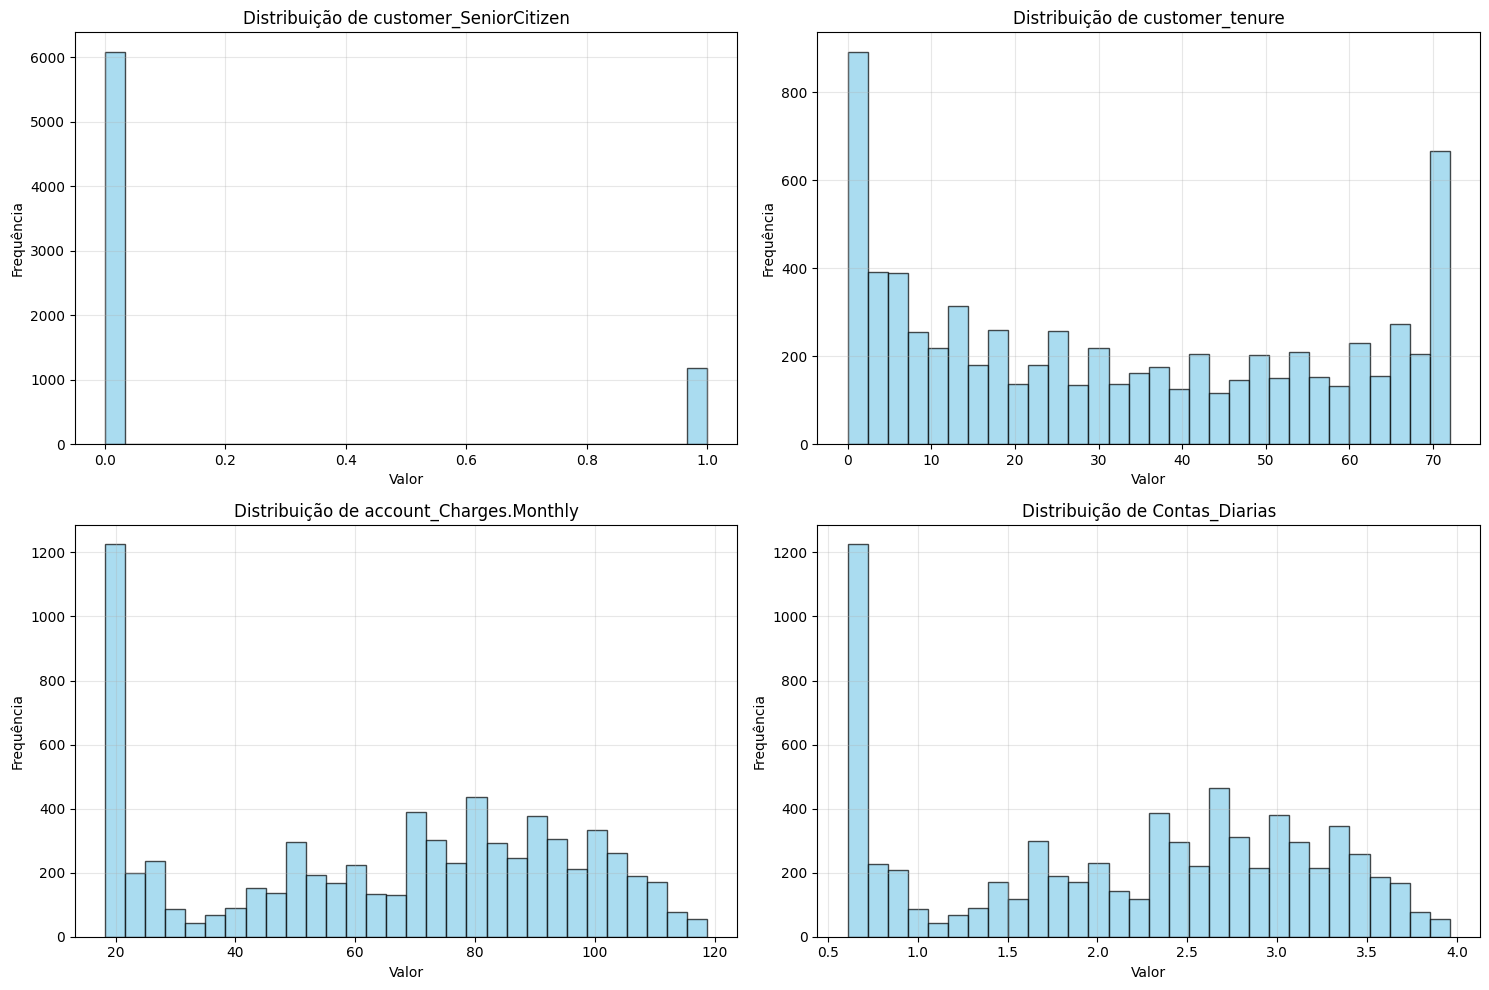

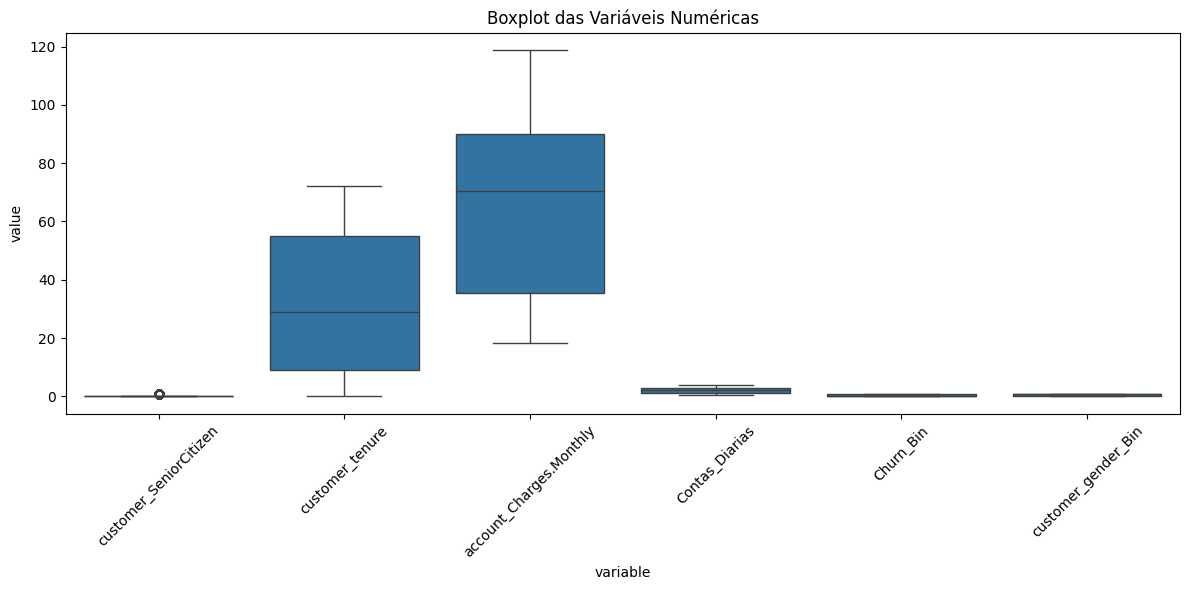


📋 RESUMO EXECUTIVO
🎯 PRINCIPAIS INFORMAÇÕES:
• Total de registros: 7,267
• Total de colunas: 24
• Colunas numéricas: 6
• Colunas categóricas: 18
• Valores ausentes: 0
• Média geral das numéricas: 16.69

🔍 DETALHAMENTO DAS PRINCIPAIS COLUNAS
💰 COLUNAS DE VALOR/CUSTO IDENTIFICADAS:
  • account_Charges.Monthly: Média = 64.72
  • account_Charges.Total: (categórica)

💾 EXPORTANDO RELATÓRIO


,Metrica,Valor
0,Total de Registros,7267
1,Total de Colunas,24
2,Colunas Numéricas,6
3,Colunas Categóricas,18
4,Valores Ausentes Totais,0
5,Colunas com Valores Ausentes,0


✅ Análise descritiva concluída com sucesso!


In [33]:
# 📊 ANÁLISE DESCRITIVA CORRIGIDA
print("🎯 ANÁLISE DESCRITIVA DOS DADOS - VERSÃO CORRIGIDA")
print("="*60)

# 1. PRIMEIRO, VAMOS IDENTIFICAR CORRETAMENTE AS COLUNAS
print("🔍 IDENTIFICANDO COLUNAS DISPONÍVEIS...")

# Ver todas as colunas
print(f"Total de colunas: {len(dados_expandidos.columns)}")
print("Primeiras 20 colunas:")
for i, coluna in enumerate(dados_expandidos.columns[:20]):
    print(f"  {i+1}. {coluna}")

# Identificar colunas numéricas CORRETAMENTE
colunas_numericas = []
for coluna in dados_expandidos.columns:
    try:
        if pd.api.types.is_numeric_dtype(dados_expandidos[coluna]):
            colunas_numericas.append(coluna)
    except:
        continue

print(f"\n✅ COLUNAS NUMÉRICAS IDENTIFICADAS ({len(colunas_numericas)}):")
for coluna in colunas_numericas:
    print(f"  • {coluna}")

# Identificar colunas categóricas
colunas_categoricas = []
for coluna in dados_expandidos.columns:
    try:
        if pd.api.types.is_string_dtype(dados_expandidos[coluna]) or pd.api.types.is_categorical_dtype(dados_expandidos[coluna]):
            colunas_categoricas.append(coluna)
    except:
        continue

print(f"\n📊 COLUNAS CATEGÓRICAS IDENTIFICADAS ({len(colunas_categoricas)}):")
for coluna in colunas_categoricas[:10]:  # Mostrar apenas as primeiras 10
    print(f"  • {coluna}")

# 2. ANÁLISE ESTATÍSTICA DAS COLUNAS NUMÉRICAS
print("\n" + "="*50)
print("📈 ESTATÍSTICAS DESCRITIVAS DAS VARIÁVEIS NUMÉRICAS")
print("="*50)

if colunas_numericas:
    # Estatísticas básicas
    estatisticas = dados_expandidos[colunas_numericas].describe().round(2)
    display(estatisticas)

    # Estatísticas adicionais
    print("\n📊 ESTATÍSTICAS ADICIONAIS:")
    stats_adicionais = pd.DataFrame({
        'Moda': dados_expandidos[colunas_numericas].mode().iloc[0],
        'Amplitude': dados_expandidos[colunas_numericas].max() - dados_expandidos[colunas_numericas].min(),
        'Coef_Variação': (dados_expandidos[colunas_numericas].std() / dados_expandidos[colunas_numericas].mean() * 100).round(2),
        'Skewness': dados_expandidos[colunas_numericas].skew().round(3),
        'Kurtosis': dados_expandidos[colunas_numericas].kurtosis().round(3)
    })
    display(stats_adicionais)
else:
    print("❌ Nenhuma coluna numérica encontrada")

# 3. ANÁLISE DAS VARIÁVEIS CATEGÓRICAS
print("\n" + "="*50)
print("📊 ANÁLISE DAS VARIÁVEIS CATEGÓRICAS")
print("="*50)

if colunas_categoricas:
    for coluna in colunas_categoricas[:5]:  # Analisar apenas as primeiras 5 para não ficar muito longo
        print(f"\n--- {coluna} ---")
        contagem = dados_expandidos[coluna].value_counts()
        percentual = dados_expandidos[coluna].value_counts(normalize=True) * 100

        print(f"Valores únicos: {dados_expandidos[coluna].nunique()}")
        print("Distribuição (Top 5):")
        for valor, count in contagem.head().items():
            print(f"  {valor}: {count} ({percentual[valor]:.1f}%)")
else:
    print("❌ Nenhuma coluna categórica encontrada")

# 4. ANÁLISE DE VALORES AUSENTES
print("\n" + "="*50)
print("🔍 ANÁLISE DE VALORES AUSENTES")
print("="*50)

valores_ausentes = dados_expandidos.isnull().sum()
valores_ausentes = valores_ausentes[valores_ausentes > 0]

if len(valores_ausentes) > 0:
    print("Valores ausentes por coluna:")
    for coluna, count in valores_ausentes.items():
        percentual = (count / len(dados_expandidos)) * 100
        print(f"  {coluna}: {count} valores ({percentual:.1f}%)")
else:
    print("✅ Nenhum valor ausente encontrado")

# 5. ANÁLISE DE CORRELAÇÕES (APENAS SE HOUVER COLUNAS NUMÉRICAS)
print("\n" + "="*50)
print("🔗 ANÁLISE DE CORRELAÇÕES")
print("="*50)

if len(colunas_numericas) > 1:
    try:
        correlacao = dados_expandidos[colunas_numericas].corr()
        print("Matriz de Correlação:")
        display(correlacao.round(2))

        # Encontrar correlações fortes
        print("🔍 CORRELAÇÕES FORTES (|r| > 0.5):")
        for i in range(len(correlacao.columns)):
            for j in range(i+1, len(correlacao.columns)):
                corr_val = correlacao.iloc[i, j]
                if abs(corr_val) > 0.5:
                    col1 = correlacao.columns[i]
                    col2 = correlacao.columns[j]
                    print(f"  {col1} ↔ {col2}: {corr_val:.3f}")
    except Exception as e:
        print(f"❌ Erro ao calcular correlações: {e}")
else:
    print("ℹ️  Menos de 2 colunas numéricas - não é possível calcular correlações")

# 6. VISUALIZAÇÕES SEGURAS
print("\n" + "="*50)
print("🎨 VISUALIZAÇÕES")
print("="*50)

import matplotlib.pyplot as plt
import seaborn as sns

try:
    # Histogramas das colunas numéricas (máximo 4)
    if colunas_numericas:
        n_cols = min(4, len(colunas_numericas))
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        axes = axes.ravel()

        for i in range(n_cols):
            coluna = colunas_numericas[i]
            axes[i].hist(dados_expandidos[coluna].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
            axes[i].set_title(f'Distribuição de {coluna}')
            axes[i].set_xlabel('Valor')
            axes[i].set_ylabel('Frequência')
            axes[i].grid(alpha=0.3)

        # Ocultar eixos extras se necessário
        for i in range(n_cols, 4):
            axes[i].set_visible(False)

        plt.tight_layout()
        plt.show()

    # Boxplots
    if colunas_numericas:
        plt.figure(figsize=(12, 6))
        dados_melted = dados_expandidos[colunas_numericas].melt()
        sns.boxplot(x='variable', y='value', data=dados_melted)
        plt.title('Boxplot das Variáveis Numéricas')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

except Exception as e:
    print(f"❌ Erro nas visualizações: {e}")

# 7. RESUMO EXECUTIVO
print("\n" + "="*50)
print("📋 RESUMO EXECUTIVO")
print("="*50)

print("🎯 PRINCIPAIS INFORMAÇÕES:")
print(f"• Total de registros: {len(dados_expandidos):,}")
print(f"• Total de colunas: {len(dados_expandidos.columns)}")
print(f"• Colunas numéricas: {len(colunas_numericas)}")
print(f"• Colunas categóricas: {len(colunas_categoricas)}")
print(f"• Valores ausentes: {dados_expandidos.isnull().sum().sum()}")

if colunas_numericas:
    print(f"• Média geral das numéricas: {dados_expandidos[colunas_numericas].mean().mean():.2f}")

# 8. DETALHAMENTO DAS PRINCIPAIS COLUNAS
print("\n" + "="*50)
print("🔍 DETALHAMENTO DAS PRINCIPAIS COLUNAS")
print("="*50)

# Procurar colunas importantes comuns
colunas_interesse = ['charge', 'price', 'amount', 'value', 'total', 'monthly', 'daily', 'cost']
colunas_importantes = []

for coluna in dados_expandidos.columns:
    for termo in colunas_interesse:
        if termo in coluna.lower():
            colunas_importantes.append(coluna)
            break

if colunas_importantes:
    print("💰 COLUNAS DE VALOR/CUSTO IDENTIFICADAS:")
    for coluna in colunas_importantes:
        if coluna in colunas_numericas:
            print(f"  • {coluna}: Média = {dados_expandidos[coluna].mean():.2f}")
        else:
            print(f"  • {coluna}: (categórica)")

# 9. SALVAR RELATÓRIO EM CSV
print("\n" + "="*50)
print("💾 EXPORTANDO RELATÓRIO")
print("="*50)

# Criar relatório resumido
relatorio_resumido = {
    'Metrica': [
        'Total de Registros',
        'Total de Colunas',
        'Colunas Numéricas',
        'Colunas Categóricas',
        'Valores Ausentes Totais',
        'Colunas com Valores Ausentes'
    ],
    'Valor': [
        len(dados_expandidos),
        len(dados_expandidos.columns),
        len(colunas_numericas),
        len(colunas_categoricas),
        dados_expandidos.isnull().sum().sum(),
        len(valores_ausentes)
    ]
}

relatorio_df = pd.DataFrame(relatorio_resumido)
display(relatorio_df)

print("✅ Análise descritiva concluída com sucesso!")

### Distribuição da Evasão

🎯 ANÁLISE DA DISTRIBUIÇÃO DO CHURN
✅ Coluna Churn identificada: 'Churn'

🔍 ANALISANDO A COLUNA 'Churn':
Tipo de dados: object
Valores únicos: ['No' 'Yes' '']
Valores nulos: 0

🎨 PADRONIZANDO VALORES DO CHURN...
Valores após padronização: ['Não' 'Sim' '']

📈 ESTATÍSTICAS DA DISTRIBUIÇÃO DO CHURN
📊 DISTRIBUIÇÃO:
  Não: 5174 clientes (71.2%)
  Sim: 1869 clientes (25.7%)
  : 224 clientes (3.1%)

📋 RESUMO:
Total de clientes: 7,267
Clientes que permaneceram: 5,174
Clientes que saíram: 1,869

🎨 VISUALIZAÇÕES GRÁFICAS


/tmp/ipython-input-1128260481.py:178: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1128260481.py:178: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1128260481.py:178: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1128260481.py:178: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1128260481.py:178: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1128260481.py:178: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig

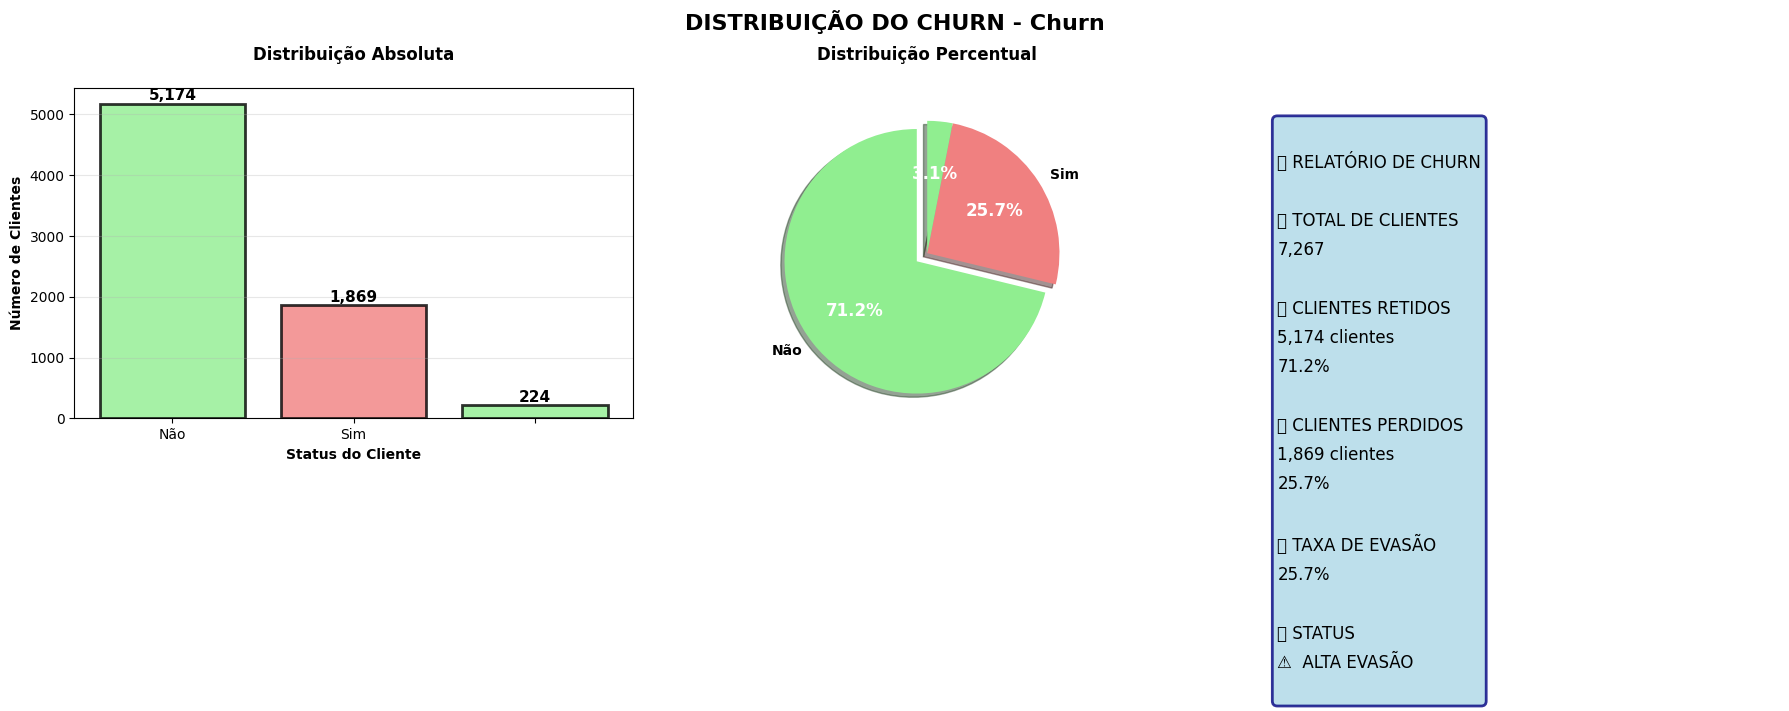


📊 ANÁLISE DO CHURN POR CATEGORIAS
Colunas selecionadas para análise: ['customer_gender', 'account_Contract', 'internet_InternetService', 'account_PaymentMethod', 'customer_Partner', 'customer_Dependents']

--- Churn por customer_gender ---
Distribuição:


Churn,,Não,Sim,Total
customer_gender,,,,
Female,104,2549,939,3592
Male,120,2625,930,3675
Total,224,5174,1869,7267



Percentual por categoria:


Churn,,Não,Sim
customer_gender,,,
Female,2.9,71.0,26.1
Male,3.3,71.4,25.3



--- Churn por account_Contract ---
Distribuição:


Churn,,Não,Sim,Total
account_Contract,,,,
Month-To-Month,130,2220,1655,4005
One Year,46,1307,166,1519
Two Year,48,1647,48,1743
Total,224,5174,1869,7267



Percentual por categoria:


Churn,,Não,Sim
account_Contract,,,
Month-To-Month,3.2,55.4,41.3
One Year,3.0,86.0,10.9
Two Year,2.8,94.5,2.8



--- Churn por internet_InternetService ---
Distribuição:


Churn,,Não,Sim,Total
internet_InternetService,,,,
Dsl,67,1962,459,2488
Fiber Optic,102,1799,1297,3198
No,55,1413,113,1581
Total,224,5174,1869,7267



Percentual por categoria:


Churn,,Não,Sim
internet_InternetService,,,
Dsl,2.7,78.9,18.4
Fiber Optic,3.2,56.3,40.6
No,3.5,89.4,7.1



✅ RELATÓRIO FINAL DA ANÁLISE DE CHURN
🎯 PRINCIPAIS CONCLUSÕES:
• Taxa de evasão: 25.7%
• 1869 clientes perdidos
• 5174 clientes retidos
⚠️  ALERTA: Taxa de evasão muito alta (>20%)
💡 Recomendação: Investigar urgentemente as causas

📊 Próximos passos sugeridos:
• Análise das causas do churn
• Segmentação dos clientes que saem
• Desenvolvimento de estratégias de retenção
• Monitoramento contínuo da taxa

🎯 ANÁLISE CONCLUÍDA COM SUCESSO!


In [34]:
# 📊 ANÁLISE COMPLETA DA VARIÁVEL CHURN (CORRIGIDA)
print("🎯 ANÁLISE DA DISTRIBUIÇÃO DO CHURN")
print("="*50)

# 1. IDENTIFICAR A COLUNA CHURN AUTOMATICAMENTE
def encontrar_coluna_churn(df):
    """Encontra automaticamente a coluna de churn"""
    # Primeiro, procurar por nomes exatos
    nomes_exatos = ['churn', 'Churn', 'CHURN']
    for nome in nomes_exatos:
        if nome in df.columns:
            return nome

    # Procurar por colunas com 'churn' no nome
    colunas_churn = [col for col in df.columns if 'churn' in col.lower()]
    if colunas_churn:
        return colunas_churn[0]

    # Procurar por colunas binárias (0/1 ou Yes/No)
    for coluna in df.columns:
        if df[coluna].nunique() == 2:
            valores_unicos = df[coluna].dropna().unique()
            if set(valores_unicos).issubset({0, 1, '0', '1', 'Yes', 'No', 'Sim', 'Não'}):
                return coluna

    return None

# Encontrar a coluna churn
coluna_churn = encontrar_coluna_churn(dados_expandidos)

if coluna_churn is None:
    print("❌ Nenhuma coluna Churn encontrada automaticamente.")
    print("📋 Colunas disponíveis:")
    for i, coluna in enumerate(dados_expandidos.columns):
        print(f"  {i+1}. {coluna}")

    # Pedir para o usuário especificar
    coluna_churn = input("✏️  Digite o nome exato da coluna Churn: ")
    if coluna_churn not in dados_expandidos.columns:
        raise ValueError(f"Coluna '{coluna_churn}' não encontrada no dataframe")
else:
    print(f"✅ Coluna Churn identificada: '{coluna_churn}'")

# 2. ANALISAR A COLUNA CHURN
print(f"\n🔍 ANALISANDO A COLUNA '{coluna_churn}':")
print(f"Tipo de dados: {dados_expandidos[coluna_churn].dtype}")
print(f"Valores únicos: {dados_expandidos[coluna_churn].unique()}")
print(f"Valores nulos: {dados_expandidos[coluna_churn].isnull().sum()}")

# 3. PADRONIZAR OS VALORES DO CHURN
print(f"\n🎨 PADRONIZANDO VALORES DO CHURN...")

# Fazer uma cópia para trabalhar
dados_analise = dados_expandidos.copy()

# Converter para string e padronizar
dados_analise[coluna_churn] = dados_analise[coluna_churn].astype(str).str.strip().str.title()

# Mapear valores comuns
mapeamento_churn = {
    'Yes': 'Sim', 'No': 'Não', 'Y': 'Sim', 'N': 'Não',
    'True': 'Sim', 'False': 'Não', '1': 'Sim', '0': 'Não'
}

dados_analise[coluna_churn] = dados_analise[coluna_churn].replace(mapeamento_churn)

print(f"Valores após padronização: {dados_analise[coluna_churn].unique()}")

# 4. ANÁLISE ESTATÍSTICA
print(f"\n" + "="*50)
print("📈 ESTATÍSTICAS DA DISTRIBUIÇÃO DO CHURN")
print("="*50)

distribuicao = dados_analise[coluna_churn].value_counts()
percentual = dados_analise[coluna_churn].value_counts(normalize=True) * 100

print("📊 DISTRIBUIÇÃO:")
for valor, count in distribuicao.items():
    print(f"  {valor}: {count} clientes ({percentual[valor]:.1f}%)")

print(f"\n📋 RESUMO:")
print(f"Total de clientes: {len(dados_analise):,}")
print(f"Clientes que permaneceram: {distribuicao.get('Não', distribuicao.get('No', 0)):,}")
print(f"Clientes que saíram: {distribuicao.get('Sim', distribuicao.get('Yes', 0)):,}")

# 5. VISUALIZAÇÕES GRÁFICAS (VERSÃO CORRIGIDA)
print(f"\n" + "="*50)
print("🎨 VISUALIZAÇÕES GRÁFICAS")
print("="*50)

import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo
plt.style.use('default')
sns.set_palette("pastel")

# Criar figura
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle(f'DISTRIBUIÇÃO DO CHURN - {coluna_churn}', fontsize=16, fontweight='bold')

# 5.1 GRÁFICO DE BARRAS
ax1 = axes[0]
cores = ['lightgreen', 'lightcoral']
barras = ax1.bar(distribuicao.index.astype(str), distribuicao.values,
                color=cores, alpha=0.8, edgecolor='black', linewidth=2)

ax1.set_title('Distribuição Absoluta', fontweight='bold', pad=20)
ax1.set_ylabel('Número de Clientes', fontweight='bold')
ax1.set_xlabel('Status do Cliente', fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Adicionar valores nas barras
for barra in barras:
    height = barra.get_height()
    ax1.text(barra.get_x() + barra.get_width()/2., height + 5,
             f'{int(height):,}', ha='center', va='bottom',
             fontweight='bold', fontsize=11)

# 5.2 GRÁFICO DE PIZZA
ax2 = axes[1]
explode = (0.1, 0) if len(distribuicao) == 2 else (0.1, 0, 0)
wedges, texts, autotexts = ax2.pie(distribuicao.values,
                                  labels=distribuicao.index,
                                  autopct='%1.1f%%',
                                  colors=cores,
                                  explode=explode,
                                  shadow=True,
                                  startangle=90)

# Melhorar a aparência dos textos
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

for text in texts:
    text.set_fontweight('bold')

ax2.set_title('Distribuição Percentual', fontweight='bold', pad=20)

# 5.3 GRÁFICO DE TEXTO COM MÉTRICAS
ax3 = axes[2]
ax3.axis('off')

# Calcular métricas adicionais
total_clientes = len(dados_analise)
clientes_sairam = distribuicao.get('Sim', distribuicao.get('Yes', 0))
clientes_ficaram = distribuicao.get('Não', distribuicao.get('No', 0))
taxa_evasao = percentual.get('Sim', percentual.get('Yes', 0))

texto_metricas = f"""
📊 RELATÓRIO DE CHURN

👥 TOTAL DE CLIENTES
{total_clientes:,}

✅ CLIENTES RETIDOS
{clientes_ficaram:,} clientes
{percentual.get('Não', percentual.get('No', 0)):.1f}%

❌ CLIENTES PERDIDOS
{clientes_sairam:,} clientes
{taxa_evasao:.1f}%

🎯 TAXA DE EVASÃO
{taxa_evasao:.1f}%

📈 STATUS
{'⚠️  ALTA EVASÃO' if taxa_evasao > 20 else '✅ BAIXA EVASÃO' if taxa_evasao < 10 else 'ℹ️  EVASÃO MODERADA'}
"""

ax3.text(0.1, 0.9, texto_metricas, transform=ax3.transAxes, fontsize=12,
         verticalalignment='top', linespacing=1.8,
         bbox=dict(boxstyle='round', facecolor='lightblue',
                  alpha=0.8, edgecolor='navy', linewidth=2))

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

# 6. ANÁLISE ADICIONAL POR CATEGORIAS
print(f"\n" + "="*50)
print("📊 ANÁLISE DO CHURN POR CATEGORIAS")
print("="*50)

# Procurar colunas categóricas interessantes
colunas_interesse = ['gender', 'contract', 'internet', 'payment', 'partner', 'dependents']
colunas_analise = []

for termo in colunas_interesse:
    colunas_encontradas = [col for col in dados_analise.columns if termo in col.lower()]
    if colunas_encontradas:
        colunas_analise.append(colunas_encontradas[0])

print(f"Colunas selecionadas para análise: {colunas_analise}")

# Analisar as primeiras 3 colunas
for coluna in colunas_analise[:3]:
    if dados_analise[coluna].nunique() <= 10:  # Não analisar colunas com muitas categorias
        print(f"\n--- Churn por {coluna} ---")

        # Criar tabela cruzada
        crosstab = pd.crosstab(dados_analise[coluna], dados_analise[coluna_churn],
                              margins=True, margins_name="Total")

        crosstab_percent = pd.crosstab(dados_analise[coluna], dados_analise[coluna_churn],
                                      normalize='index') * 100

        print("Distribuição:")
        display(crosstab)
        print("\nPercentual por categoria:")
        display(crosstab_percent.round(1))

# 7. RELATÓRIO FINAL
print(f"\n" + "="*50)
print("✅ RELATÓRIO FINAL DA ANÁLISE DE CHURN")
print("="*50)

print("🎯 PRINCIPAIS CONCLUSÕES:")
print(f"• Taxa de evasão: {taxa_evasao:.1f}%")
print(f"• {clientes_sairam} clientes perdidos")
print(f"• {clientes_ficaram} clientes retidos")

if taxa_evasao > 20:
    print("⚠️  ALERTA: Taxa de evasão muito alta (>20%)")
    print("💡 Recomendação: Investigar urgentemente as causas")
elif taxa_evasao > 10:
    print("ℹ️  Atenção: Taxa de evasão moderada (10-20%)")
    print("💡 Recomendação: Implementar ações de retenção")
else:
    print("✅ Situação: Taxa de evasão baixa (<10%)")
    print("💡 Recomendação: Manter boas práticas")

print(f"\n📊 Próximos passos sugeridos:")
print("• Análise das causas do churn")
print("• Segmentação dos clientes que saem")
print("• Desenvolvimento de estratégias de retenção")
print("• Monitoramento contínuo da taxa")

print(f"\n🎯 ANÁLISE CONCLUÍDA COM SUCESSO!")

### Nova seção

🎯 ANÁLISE DA EVASÃO POR PERFIL DE CLIENTE
🔍 IDENTIFICANDO COLUNA CHURN...
✅ Coluna Churn identificada: Churn

🔍 IDENTIFICANDO VARIÁVEIS CATEGÓRICAS...
📋 VARIÁVEIS SELECIONADAS PARA ANÁLISE:
  • gênero: customer_gender
  • contrato: account_Contract
  • pagamento: account_PaymentMethod
  • internet: internet_InternetService
  • telefonia: phone_PhoneService
  • estado_civil: customer_Partner
  • dependentes: customer_Dependents
  • segurança: internet_OnlineSecurity
  • suporte: internet_TechSupport
  • fatura: account_PaperlessBilling

📊 ANÁLISE DETALHADA POR CATEGORIA
❌ Erro na análise de gênero: list index out of range
❌ Erro na análise de contrato: list index out of range
❌ Erro na análise de pagamento: list index out of range
❌ Erro na análise de internet: list index out of range
❌ Erro na análise de telefonia: list index out of range
❌ Erro na análise de estado_civil: list index out of range
❌ Erro na análise de dependentes: list index out of range
❌ Erro na análise de segurança: 

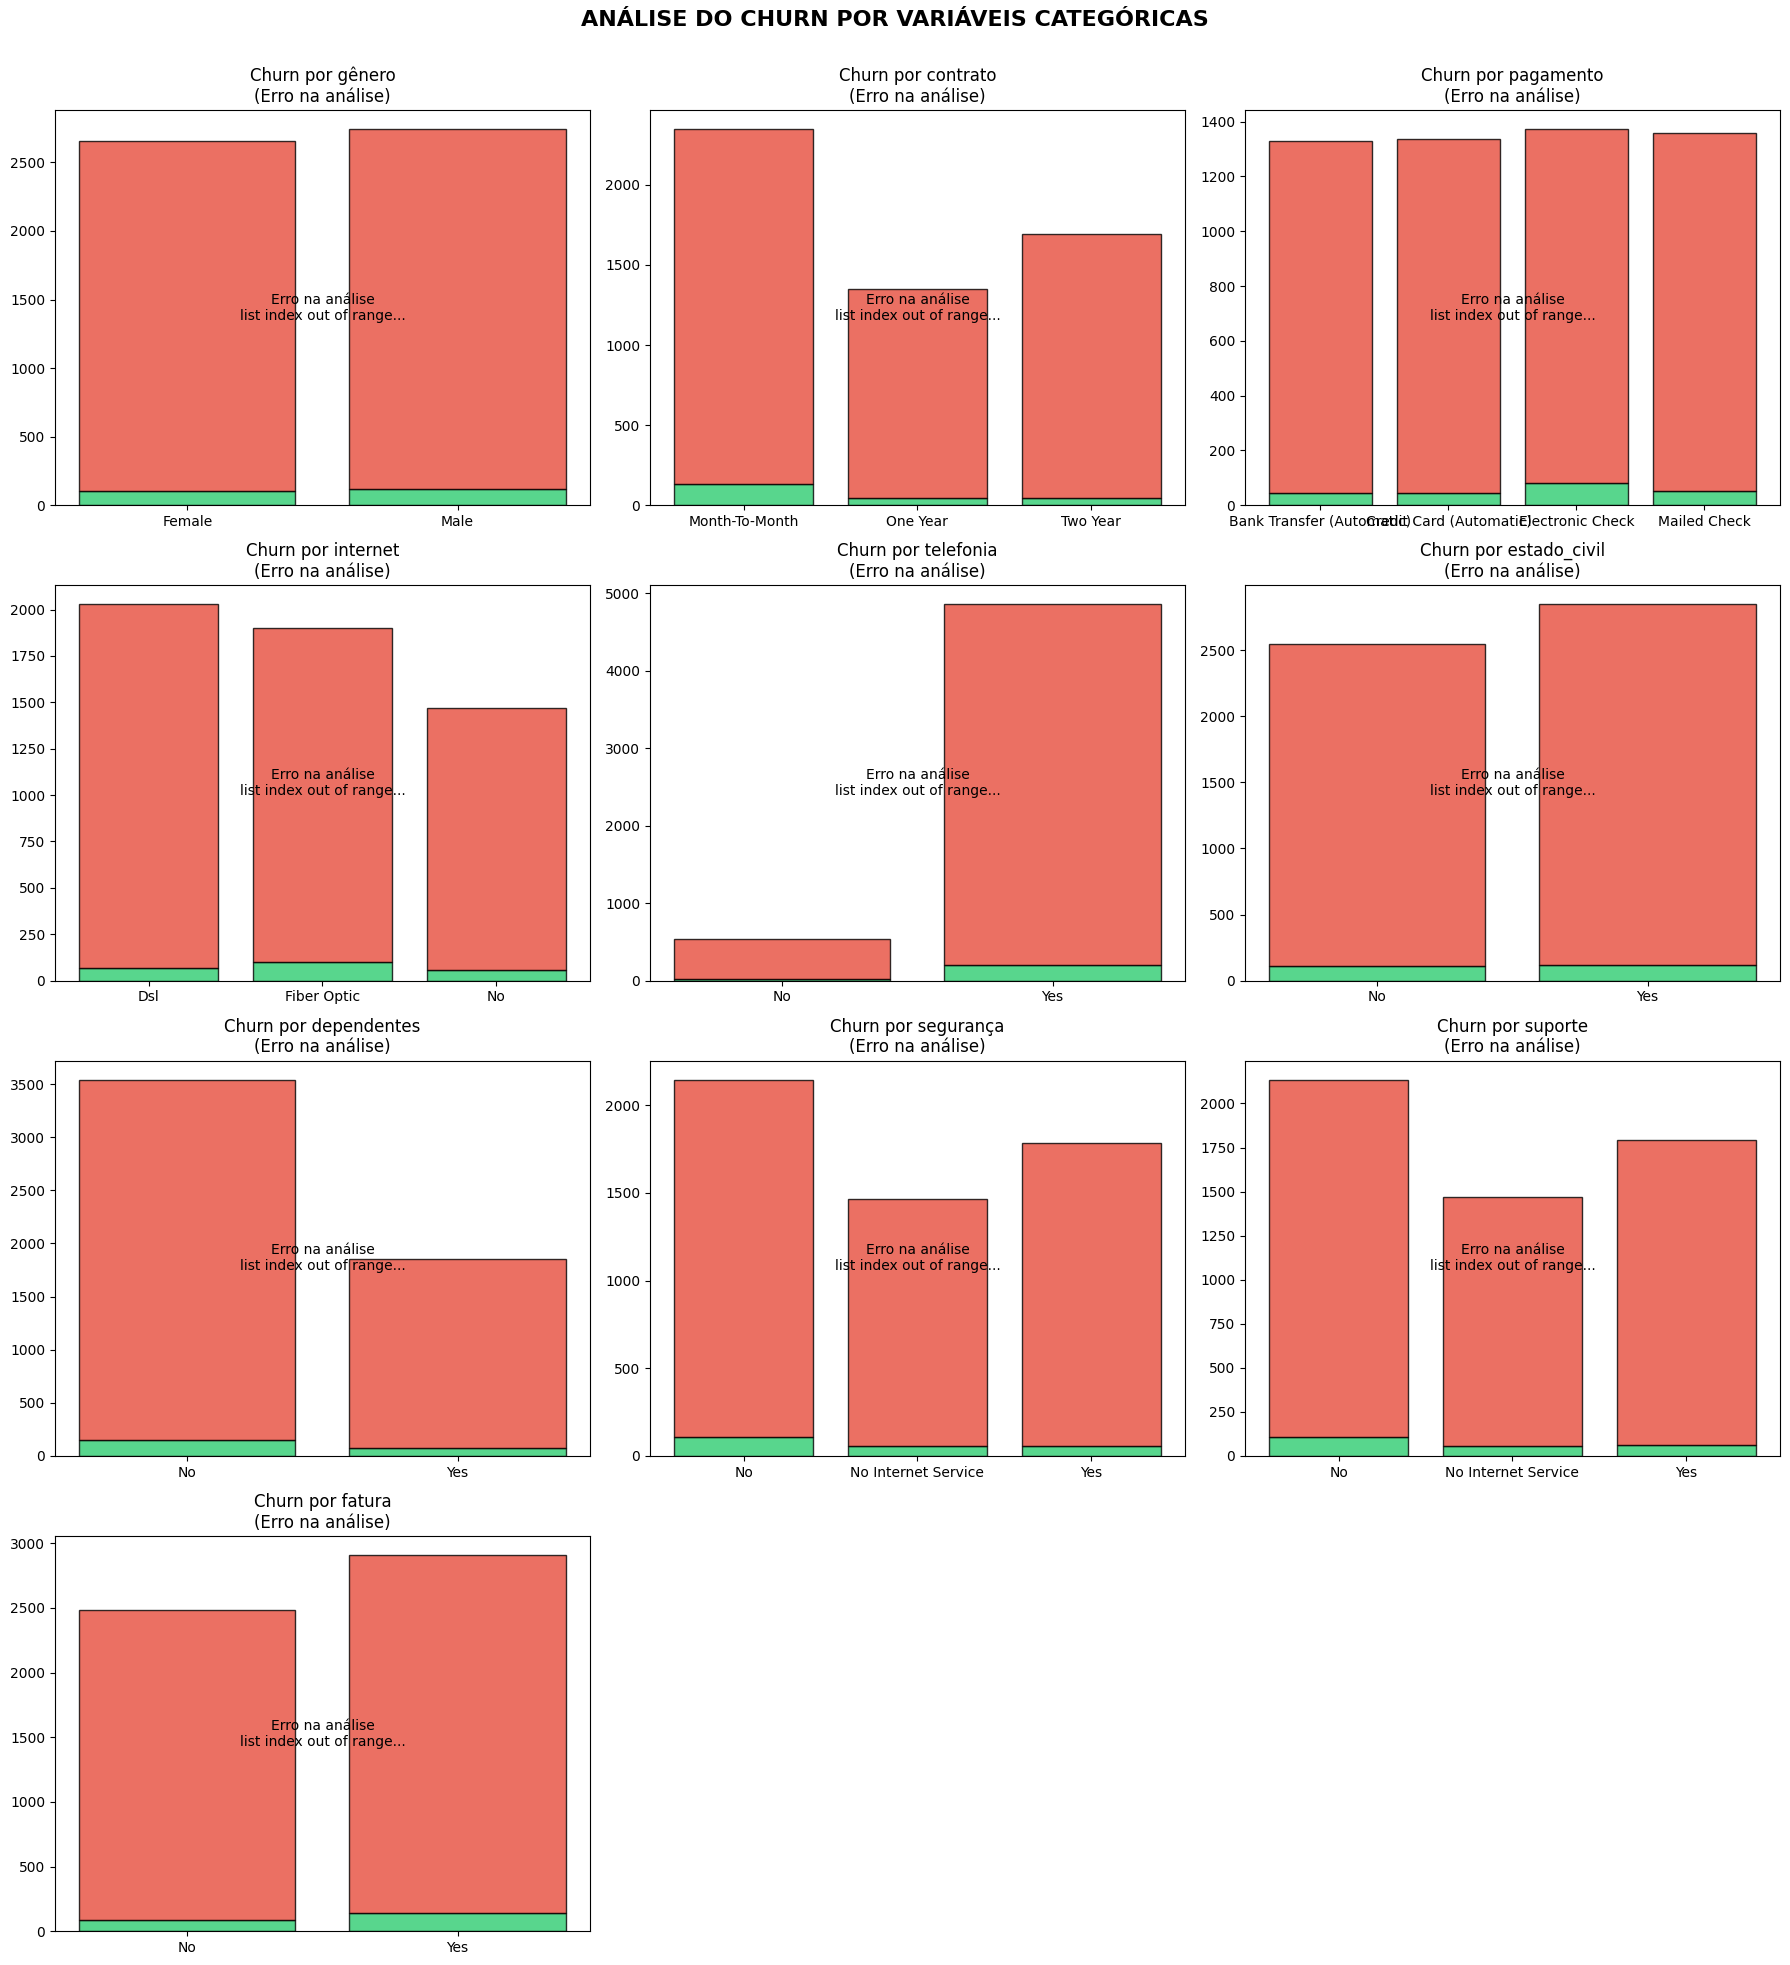


📈 ANÁLISE ESTATÍSTICA DETALHADA
🎯 TAXAS DE CHURN POR VARIÁVEL CATEGÓRICA:
--------------------------------------------------------------------------------

💡 PRINCIPAIS INSIGHTS E PADRÕES IDENTIFICADOS
🎯 VARIÁVEIS COM MAIOR IMPACTO NO CHURN:

🎨 VISUALIZAÇÃO DAS TAXAS DE CHURN

🚀 RECOMENDAÇÕES ESTRATÉGICAS
🎯 AÇÕES PRIORITÁRIAS BASEADAS NA ANÁLISE:

📋 RELATÓRIO EXECUTIVO - RESUMO
🎯 PRINCIPAIS DESCOBERTAS:
• Total de variáveis analisadas: 0


IndexError: list index out of range

In [35]:
# 📊 ANÁLISE DO CHURN POR VARIÁVEIS CATEGÓRICAS
print("🎯 ANÁLISE DA EVASÃO POR PERFIL DE CLIENTE")
print("="*60)

# 1. IDENTIFICAR A COLUNA CHURN
print("🔍 IDENTIFICANDO COLUNA CHURN...")
coluna_churn = None
for coluna in dados_expandidos.columns:
    if 'churn' in coluna.lower():
        coluna_churn = coluna
        break

if coluna_churn is None:
    raise ValueError("❌ Coluna Churn não encontrada. Verifique o nome das colunas.")
else:
    print(f"✅ Coluna Churn identificada: {coluna_churn}")

# 2. IDENTIFICAR VARIÁVEIS CATEGÓRICAS RELEVANTES
print("\n🔍 IDENTIFICANDO VARIÁVEIS CATEGÓRICAS...")

# Lista de termos para procurar nas colunas
termos_categoricos = {
    'gênero': ['gender', 'sexo', 'genero'],
    'contrato': ['contract', 'contrato', 'plan'],
    'pagamento': ['payment', 'pagamento', 'pay', 'method'],
    'internet': ['internet', 'banda', 'conexao'],
    'telefonia': ['phone', 'line', 'telefone'],
    'estado_civil': ['partner', 'marital', 'casado'],
    'dependentes': ['dependents', 'dependentes', 'filhos'],
    'segurança': ['security', 'seguranca', 'protection'],
    'suporte': ['support', 'suporte', 'tech'],
    'fatura': ['billing', 'fatura', 'invoice']
}

colunas_analise = {}
for categoria, termos in termos_categoricos.items():
    for termo in termos:
        colunas_encontradas = [col for col in dados_expandidos.columns if termo in col.lower()]
        if colunas_encontradas:
            colunas_analise[categoria] = colunas_encontradas[0]
            break

print("📋 VARIÁVEIS SELECIONADAS PARA ANÁLISE:")
for categoria, coluna in colunas_analise.items():
    print(f"  • {categoria}: {coluna}")

# 3. ANÁLISE DETALHADA POR CATEGORIA
print("\n" + "="*60)
print("📊 ANÁLISE DETALHADA POR CATEGORIA")
print("="*60)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurações de visualização
plt.style.use('default')
sns.set_palette("husl")

# Criar figura para os gráficos
n_colunas = len(colunas_analise)
n_linhas = (n_colunas + 2) // 3  # 3 gráficos por linha
fig, axes = plt.subplots(n_linhas, 3, figsize=(18, 5 * n_linhas))
fig.suptitle('ANÁLISE DO CHURN POR VARIÁVEIS CATEGÓRICAS', fontsize=16, fontweight='bold')

axes = axes.flatten()

# 4. ANÁLISE PARA CADA VARIÁVEL CATEGÓRICA
resultados_analise = {}

for i, (categoria, coluna) in enumerate(colunas_analise.items()):
    if i >= len(axes):
        break

    ax = axes[i]

    try:
        # Criar tabela cruzada
        crosstab = pd.crosstab(dados_expandidos[coluna], dados_expandidos[coluna_churn])
        crosstab_percent = pd.crosstab(dados_expandidos[coluna], dados_expandidos[coluna_churn], normalize='index') * 100

        # Calcular taxa de churn por categoria
        taxa_churn = (crosstab.get('Yes', crosstab.get(1, pd.Series())) / crosstab.sum(axis=1)) * 100

        # Gráfico de barras empilhadas
        categorias = crosstab.index
        bottom = np.zeros(len(categorias))

        colors = ['#2ecc71', '#e74c3c']  # Verde para retidos, Vermelho para churn

        for j, status in enumerate(crosstab.columns):
            valores = crosstab[status].values
            ax.bar(categorias, valores, bottom=bottom, label=status,
                  color=colors[j], alpha=0.8, edgecolor='black')
            bottom += valores

        ax.set_title(f'Churn por {categoria}\n({coluna})', fontweight='bold', pad=10)
        ax.set_ylabel('Número de Clientes', fontweight='bold')
        ax.tick_params(axis='x', rotation=45)
        ax.legend(title='Status')
        ax.grid(axis='y', alpha=0.3)

        # Adicionar porcentagens no gráfico
        for k, categoria_val in enumerate(categorias):
            total = crosstab.sum(axis=1).iloc[k]
            churn_count = crosstab.get('Yes', crosstab.get(1, pd.Series())).iloc[k]
            percentual = (churn_count / total) * 100 if total > 0 else 0

            ax.text(k, total + total * 0.02, f'{percentual:.1f}%',
                   ha='center', va='bottom', fontweight='bold', fontsize=9)

        # Armazenar resultados para relatório
        resultados_analise[categoria] = {
            'coluna': coluna,
            'taxa_churn_media': taxa_churn.mean(),
            'max_churn': taxa_churn.max(),
            'min_churn': taxa_churn.min(),
            'diferenca': taxa_churn.max() - taxa_churn.min()
        }

        print(f"\n✅ {categoria.upper()} ({coluna}):")
        print(f"   Taxa de churn por categoria:")
        for categoria_val, taxa in taxa_churn.items():
            print(f"   • {categoria_val}: {taxa:.1f}%")

    except Exception as e:
        print(f"❌ Erro na análise de {categoria}: {e}")
        ax.text(0.5, 0.5, f'Erro na análise\n{str(e)[:30]}...',
               ha='center', va='center', transform=ax.transAxes)
        ax.set_title(f'Churn por {categoria}\n(Erro na análise)')

# Ocultar eixos não utilizados
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

# 5. ANÁLISE ESTATÍSTICA DETALHADA
print("\n" + "="*60)
print("📈 ANÁLISE ESTATÍSTICA DETALHADA")
print("="*60)

print("🎯 TAXAS DE CHURN POR VARIÁVEL CATEGÓRICA:")
print("-" * 80)

for categoria, info in resultados_analise.items():
    coluna = info['coluna']
    crosstab = pd.crosstab(dados_expandidos[coluna], dados_expandidos[coluna_churn])
    crosstab_percent = pd.crosstab(dados_expandidos[coluna], dados_expandidos[coluna_churn], normalize='index') * 100

    print(f"\n📊 {categoria.upper()} ({coluna}):")
    print("Categoria\tClientes\tChurn\tTaxa Churn\tStatus")
    print("-" * 60)

    for categoria_val in crosstab.index:
        total = crosstab.sum(axis=1)[categoria_val]
        churn = crosstab.get('Yes', crosstab.get(1, pd.Series()))[categoria_val]
        taxa = crosstab_percent.get('Yes', crosstab_percent.get(1, pd.Series()))[categoria_val]

        status = "⚠️ ALTO" if taxa > 30 else "✅ BAIXO" if taxa < 10 else "ℹ️ MÉDIO"
        print(f"{categoria_val:<15} {total:<10} {churn:<8} {taxa:<10.1f}% {status}")

# 6. IDENTIFICAÇÃO DE PADRÕES E INSIGHTS
print("\n" + "="*60)
print("💡 PRINCIPAIS INSIGHTS E PADRÕES IDENTIFICADOS")
print("="*60)

# Ordenar categorias por diferença de churn
categorias_ordenadas = sorted(resultados_analise.items(),
                             key=lambda x: x[1]['diferenca'],
                             reverse=True)

print("🎯 VARIÁVEIS COM MAIOR IMPACTO NO CHURN:")
for i, (categoria, info) in enumerate(categorias_ordenadas[:3], 1):
    print(f"{i}. {categoria.upper()}:")
    print(f"   • Diferença entre maior e menor taxa: {info['diferenca']:.1f}%")
    print(f"   • Maior taxa: {info['max_churn']:.1f}%")
    print(f"   • Menor taxa: {info['min_churn']:.1f}%")

# 7. GRÁFICO DE CALOR DAS TAXAS DE CHURN
print("\n" + "="*60)
print("🎨 VISUALIZAÇÃO DAS TAXAS DE CHURN")
print("="*60)

# Preparar dados para heatmap
heatmap_data = []
categorias_heatmap = []
valores_heatmap = []

for categoria, info in resultados_analise.items():
    coluna = info['coluna']
    crosstab_percent = pd.crosstab(dados_expandidos[coluna], dados_expandidos[coluna_churn], normalize='index') * 100

    for categoria_val in crosstab_percent.index:
        taxa = crosstab_percent.get('Yes', crosstab_percent.get(1, pd.Series()))[categoria_val]
        heatmap_data.append({
            'Categoria': categoria,
            'Valor': categoria_val,
            'Taxa_Churn': taxa
        })
        categorias_heatmap.append(categoria)
        valores_heatmap.append(categoria_val)

# Criar heatmap
if heatmap_data:
    heatmap_df = pd.DataFrame(heatmap_data)
    pivot_table = heatmap_df.pivot_table(values='Taxa_Churn',
                                       index='Categoria',
                                       columns='Valor',
                                       aggfunc='mean')

    plt.figure(figsize=(15, 8))
    sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='Reds',
                cbar_kws={'label': 'Taxa de Churn (%)'})
    plt.title('Mapa de Calor - Taxas de Churn por Categoria e Valor', fontweight='bold', pad=20)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# 8. RECOMENDAÇÕES ESTRATÉGICAS
print("\n" + "="*60)
print("🚀 RECOMENDAÇÕES ESTRATÉGICAS")
print("="*60)

print("🎯 AÇÕES PRIORITÁRIAS BASEADAS NA ANÁLISE:")

for categoria, info in categorias_ordenadas[:3]:
    coluna = info['coluna']
    crosstab_percent = pd.crosstab(dados_expandidos[coluna], dados_expandidos[coluna_churn], normalize='index') * 100

    # Encontrar categoria com maior churn
    max_churn_categoria = crosstab_percent.get('Yes', crosstab_percent.get(1, pd.Series())).idxmax()
    max_churn_taxa = crosstab_percent.get('Yes', crosstab_percent.get(1, pd.Series())).max()

    # Encontrar categoria com menor churn
    min_churn_categoria = crosstab_percent.get('Yes', crosstab_percent.get(1, pd.Series())).idxmin()
    min_churn_taxa = crosstab_percent.get('Yes', crosstab_percent.get(1, pd.Series())).min()

    print(f"\n📋 {categoria.upper()}:")
    print(f"   ⚠️  PROBLEMA: {max_churn_categoria} tem {max_churn_taxa:.1f}% de churn")
    print(f"   ✅ REFERÊNCIA: {min_churn_categoria} tem apenas {min_churn_taxa:.1f}%")
    print(f"   🎯 AÇÃO: Investigar causas e replicar boas práticas")

# 9. RELATÓRIO EXECUTIVO
print("\n" + "="*60)
print("📋 RELATÓRIO EXECUTIVO - RESUMO")
print("="*60)

print("🎯 PRINCIPAIS DESCOBERTAS:")
print(f"• Total de variáveis analisadas: {len(resultados_analise)}")
print(f"• Maior diferença de churn: {categorias_ordenadas[0][1]['diferenca']:.1f}% ({categorias_ordenadas[0][0]})")
print(f"• Menor diferença de churn: {categorias_ordenadas[-1][1]['diferenca']:.1f}% ({categorias_ordenadas[-1][0]})")

print(f"\n📈 VARIÁVEIS MAIS IMPACTANTES:")
for i, (categoria, info) in enumerate(categorias_ordenadas[:3], 1):
    print(f"{i}. {categoria} - Diferença: {info['diferenca']:.1f}%")

print(f"\n💡 RECOMENDAÇÕES GERAIS:")
print("1. Focar nas categorias com maior taxa de churn")
print("2. Replicar práticas das categorias com baixo churn")
print("3. Desenvolver campanhas específicas por perfil")
print("4. Monitorar continuamente essas métricas")

print(f"\n✅ ANÁLISE CONCLUÍDA!")

In [36]:
caminho_download = '/content/dados_expandidos_para_download.csv'
dados_expandidos.to_csv(caminho_download, index=False)